# 2.2 Pregled lastnosti molekulskih prstnih odtisov

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import analyze_fingerprints
from __C_konstante import *

/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1


## Pregled raznolikosti posameznih lastnosti

In [2]:
# Define the input directory
input_directory = f'{path_files}/molekulski_prstni_odtisi'

# Call the function and get the results DataFrame
results_df = analyze_fingerprints(input_directory)
results_df = results_df.sort_values(by='Share of Columns with Same Data', ascending=False)
results_df

/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1


Fingerprint  Total Features  Varying Columns  \
13               df_estate.csv              79               29   
3          df_klekota-roth.csv            4860             1832   
0         df_cdk-atompairs.csv             780              400   
18     df_cdk-substructure.csv             307              162   
19                df_lingo.csv            1024              680   
15  df_topological-torsion.csv            2048             1416   
14              df_pubchem.csv             881              646   
4             df_rdk-maccs.csv             167              156   
8                 df_maccs.csv             166              157   
5             df_atom-pair.csv            2048             1954   
1              df_extended.csv            1024             1008   
10                df_graph.csv            1024             1014   
16         df_shortestpath.csv            1024             1020   
9                   df_fp2.csv            1024             1021   
17             df_standard.csv            1024             1022   
2         df_hybridization.csv            1024             1022   
6                 df_rdkit.csv            2048             2048   
7              df_circular.csv            1024             1024   
11               df_avalon.csv             512              512   
12               df_morgan.csv            2048             2048   

    100% same values in column  95% same values in column  \
13                          50                         60   
3                         3028                       4672   
0                          380                        618   
18                         145                        263   
19                         344                        860   
15                         632                       1891   
14                         235                        540   
4                           11                         47   
8                            9                         50   
5                           94                       1379   
1                           16                         48   
10                          10                        495   
16                           4                         19   
9                            3                        436   
17                           2                         52   
2                            2                         78   
6                            0                         10   
7                            0                        703   
11                           0                         22   
12                           0                       1783   

    Share of Columns with Same Data  Collinear Features Count  
13                         0.632911                         2  
3                          0.623045                       528  
0                          0.487179                       121  
18                         0.472313                        31  
19                         0.335938                       202  
15                         0.308594                       204  
14                         0.266742                       398  
4                          0.065868                        34  
8                          0.054217                        40  
5                          0.045898                        64  
1                          0.015625                         9  
10                         0.009766                       161  
16                         0.003906                         4  
9                          0.002930                        61  
17                         0.001953                         5  
2                          0.001953                        11  
6                          0.000000                         3  
7                          0.000000                         5  
11                         0.000000                         2  
12                         0.000000              

In [3]:
# Assuming results_df is the DataFrame returned from analyze_fingerprints
filtered_fingerprints = results_df[results_df['Share of Columns with Same Data'] < 0.20]['Fingerprint'].tolist()

# Print or return the list of filtered fingerprints
print(filtered_fingerprints)

['df_rdk-maccs.csv', 'df_maccs.csv', 'df_atom-pair.csv', 'df_extended.csv', 'df_graph.csv', 'df_shortestpath.csv', 'df_fp2.csv', 'df_standard.csv', 'df_hybridization.csv', 'df_rdkit.csv', 'df_circular.csv', 'df_avalon.csv', 'df_morgan.csv']


## Dvodimenzionalen pregled razporeditve lastnosti sm pomocjo metode analize glavnih kompomnent (ang. Principal Component Analysis. PCA)

## Analiza Scree test (Scree plot)

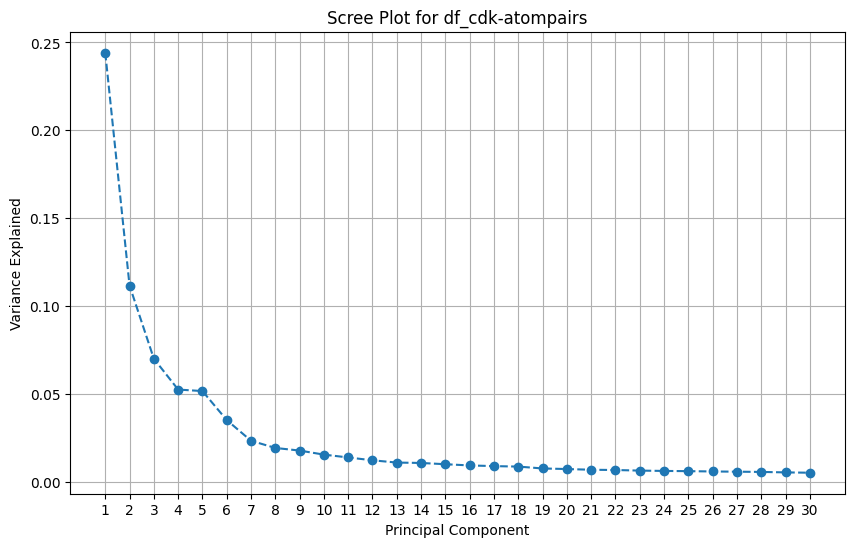

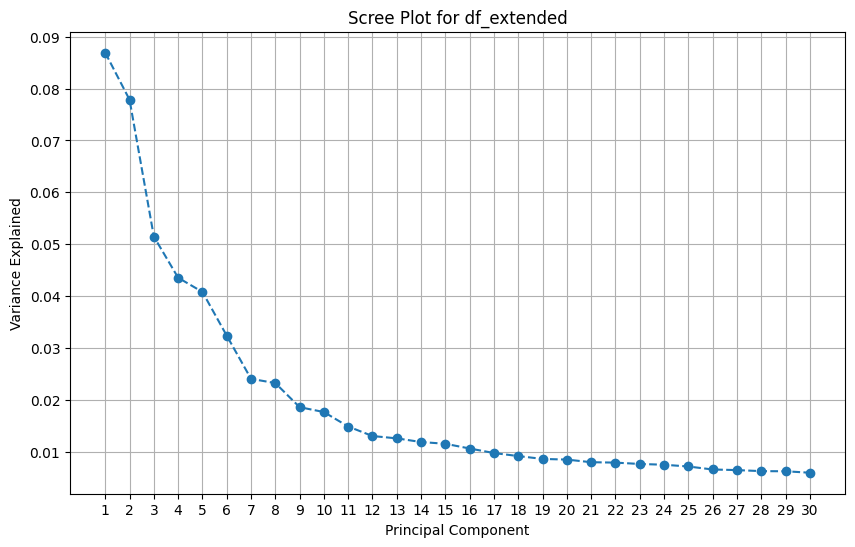

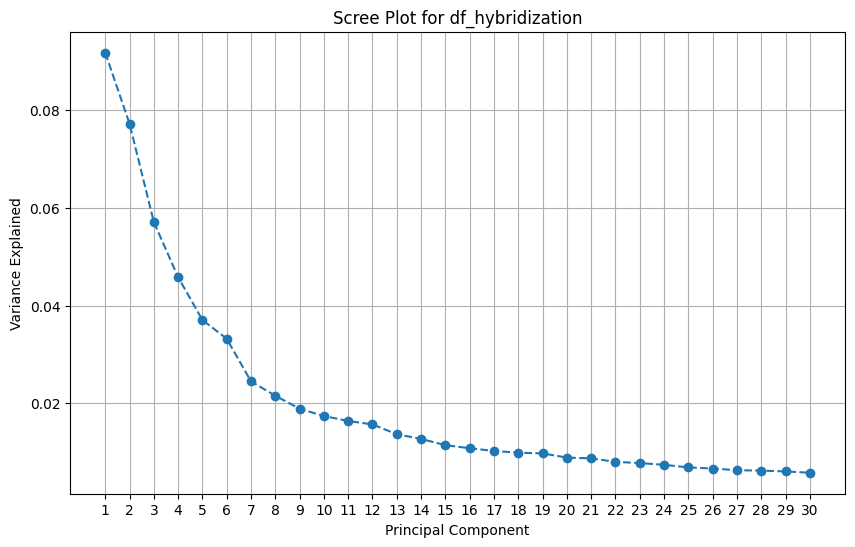

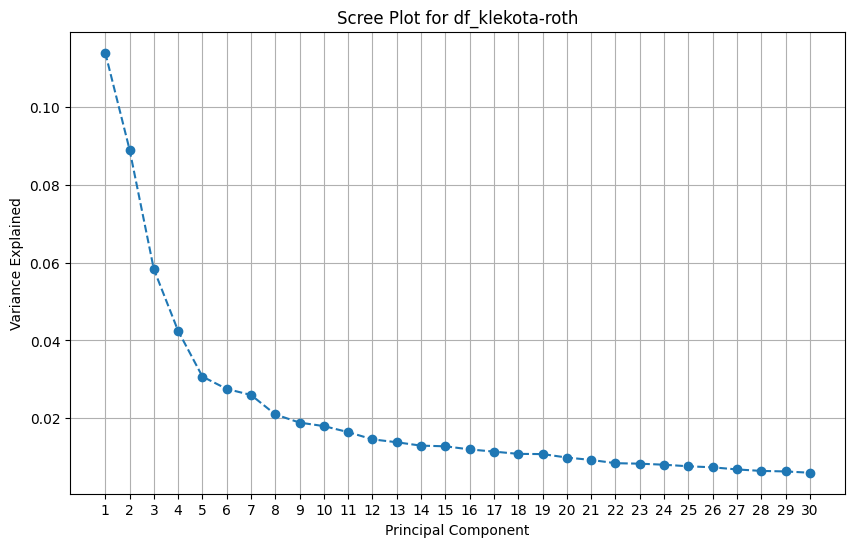

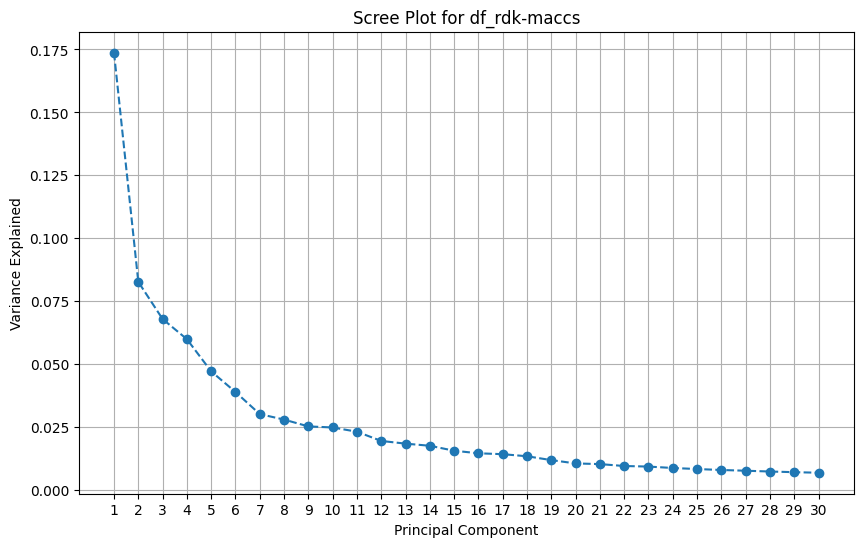

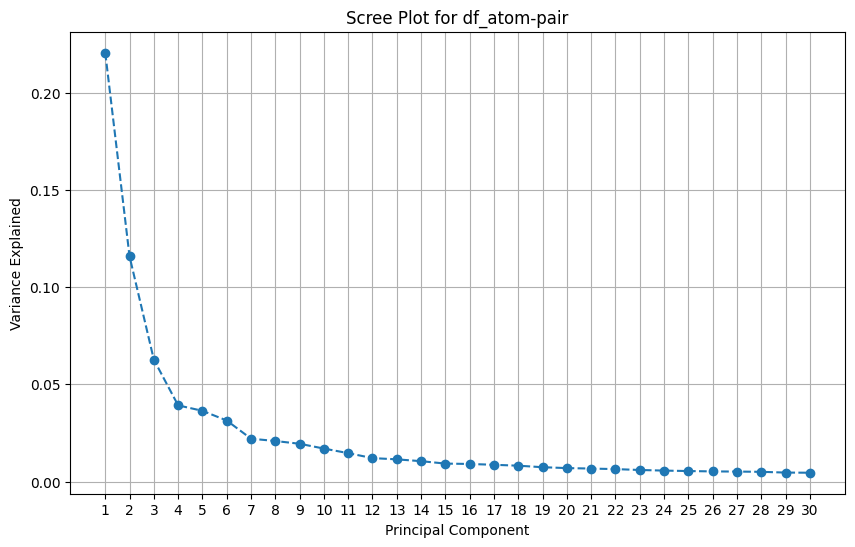

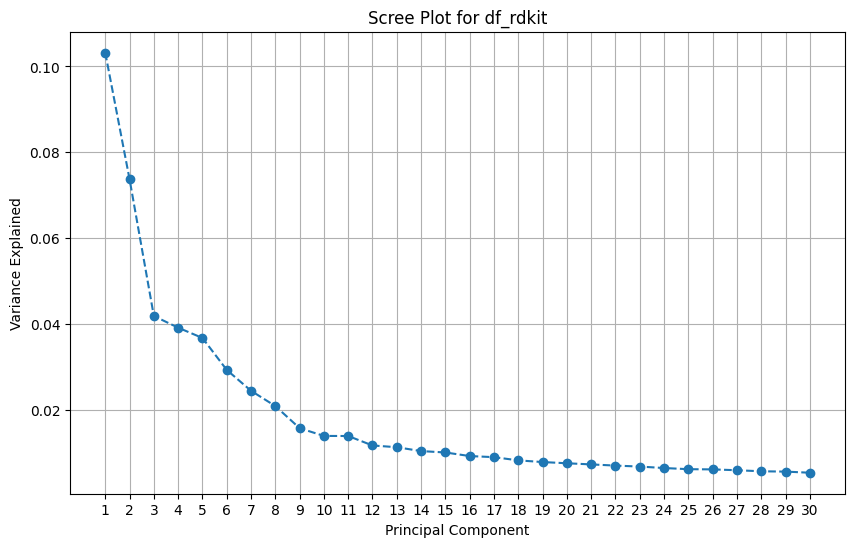

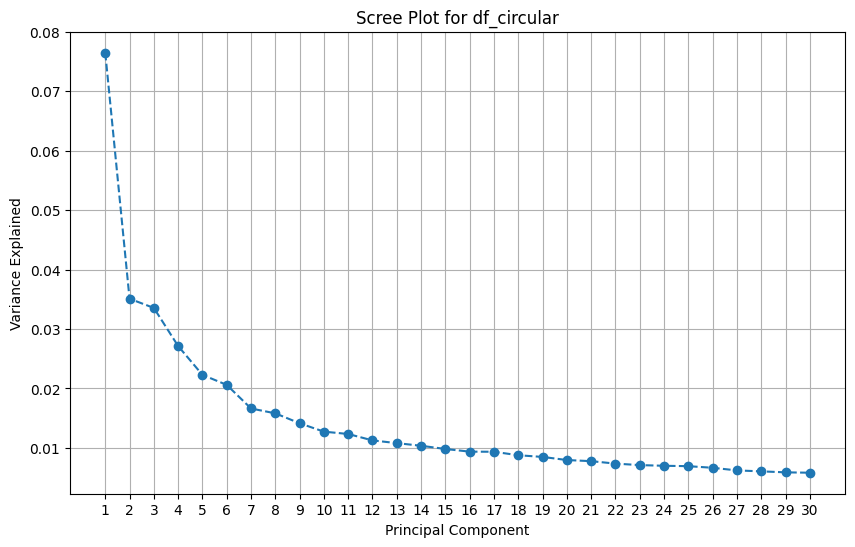

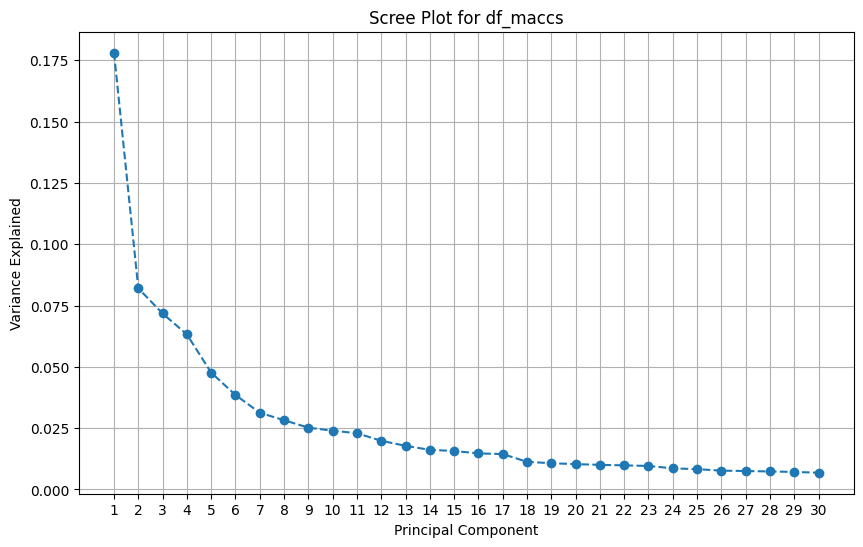

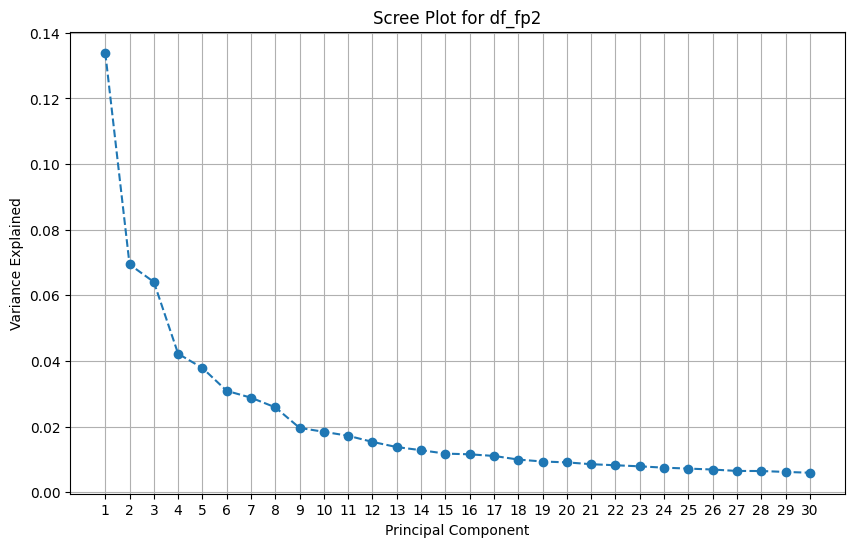

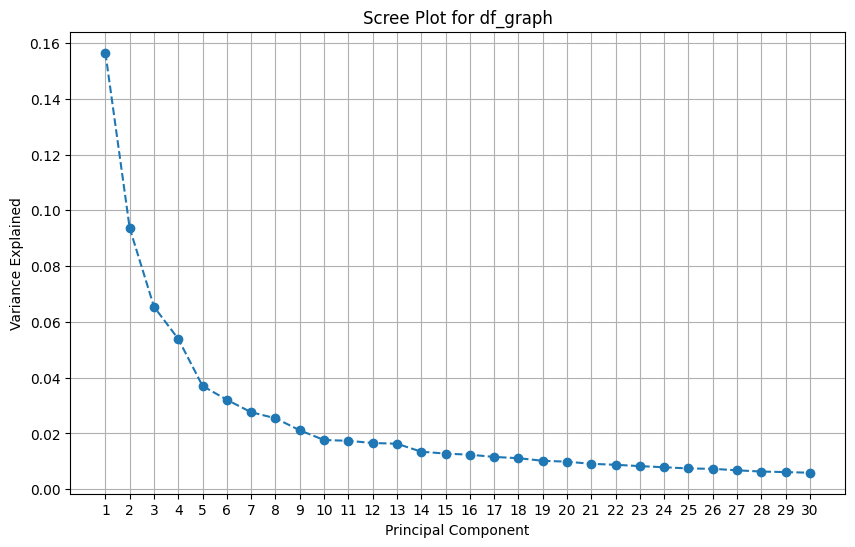

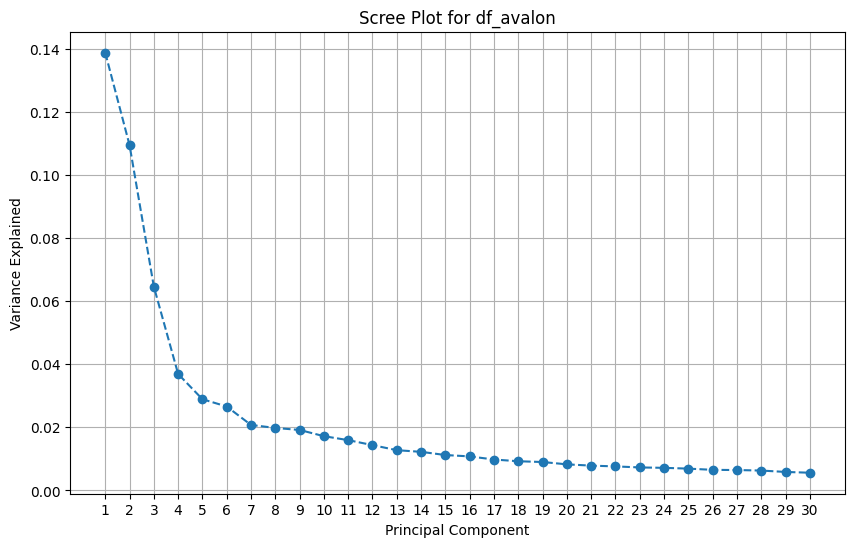

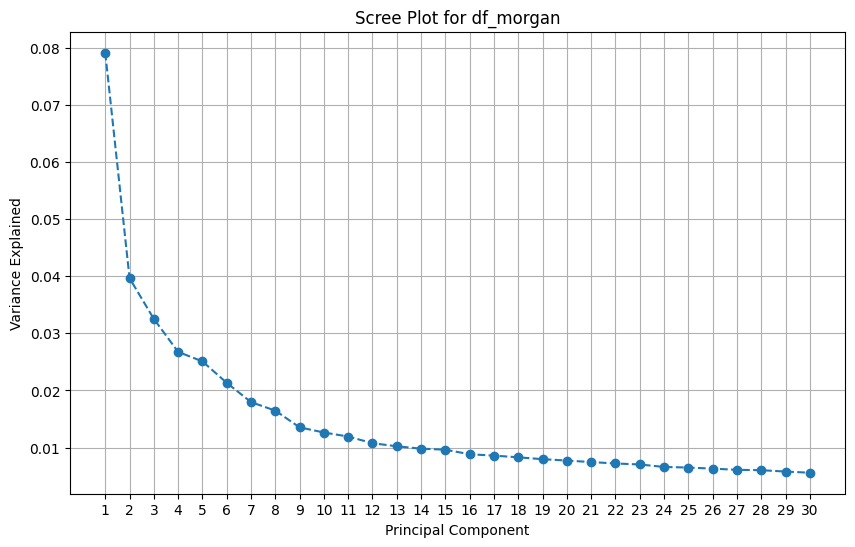

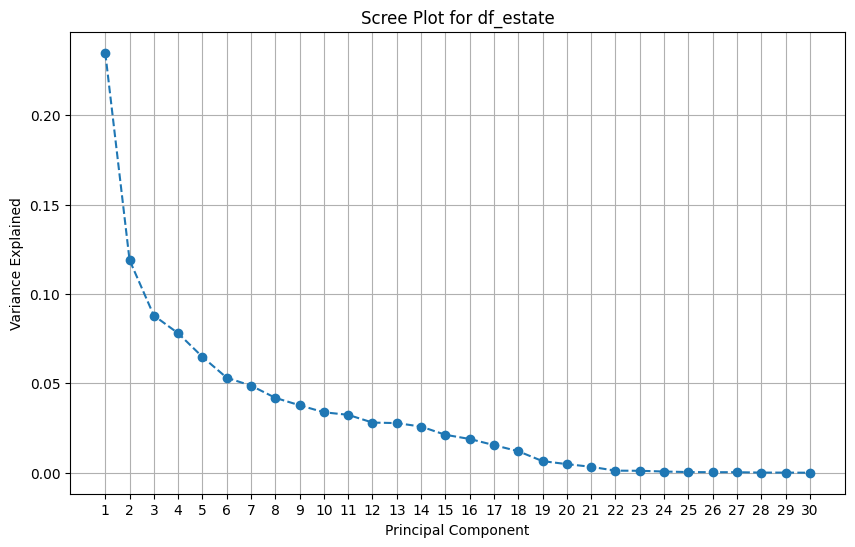

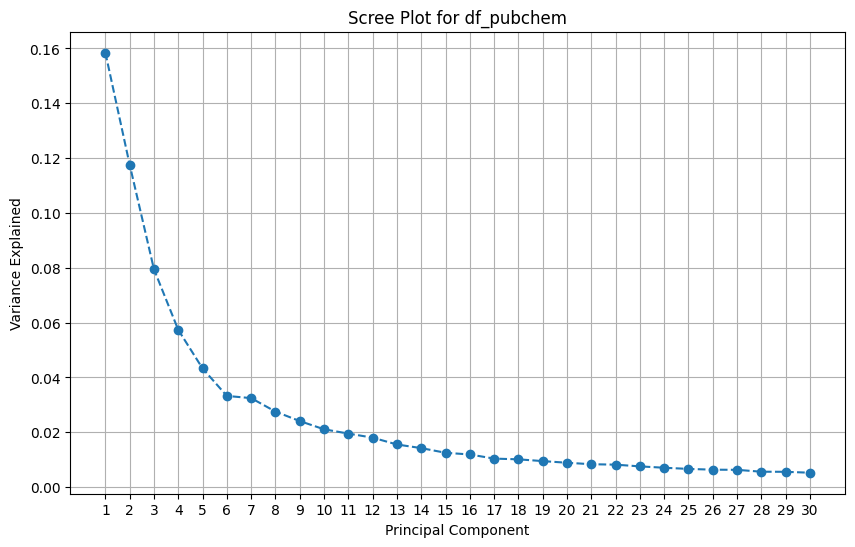

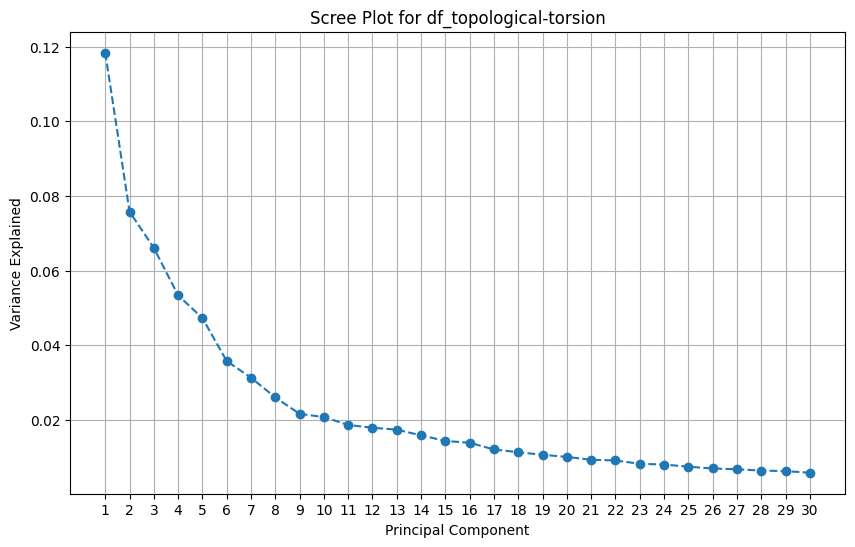

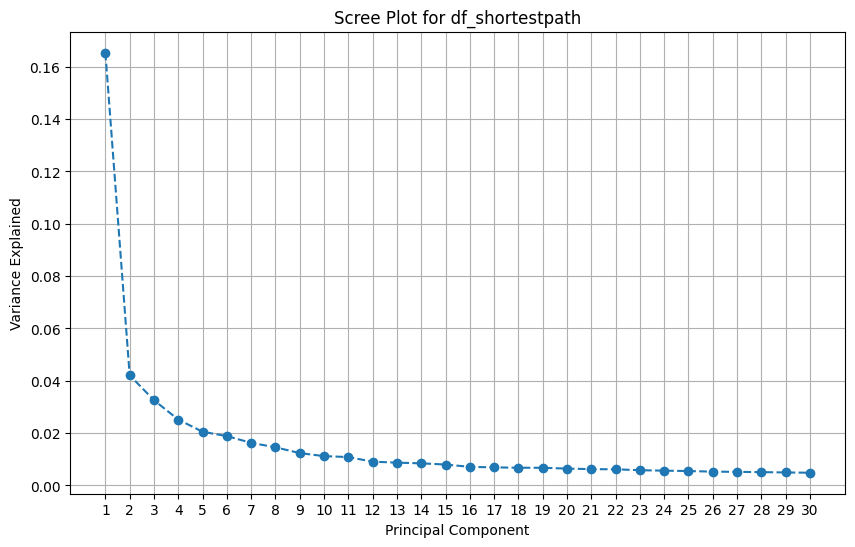

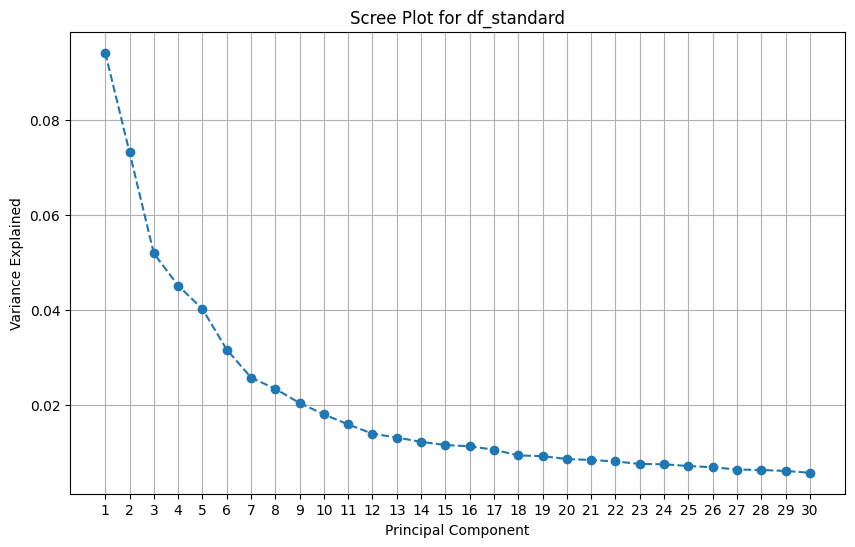

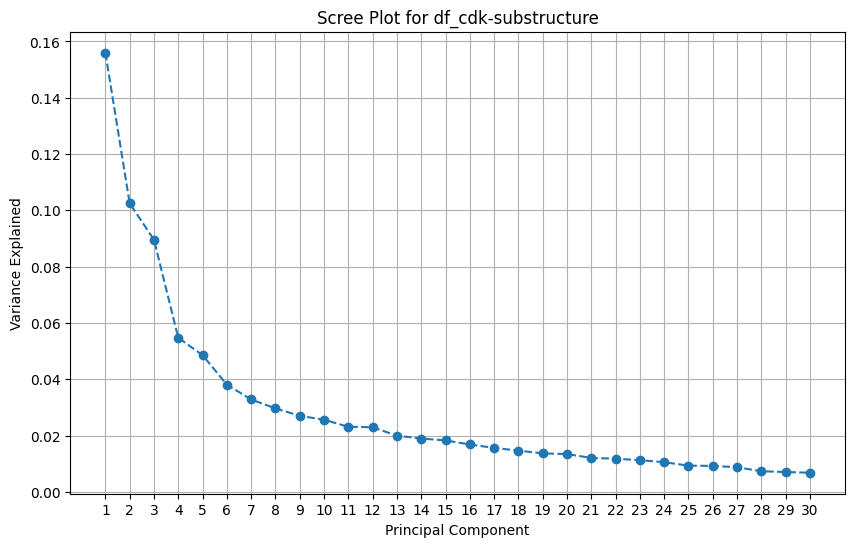

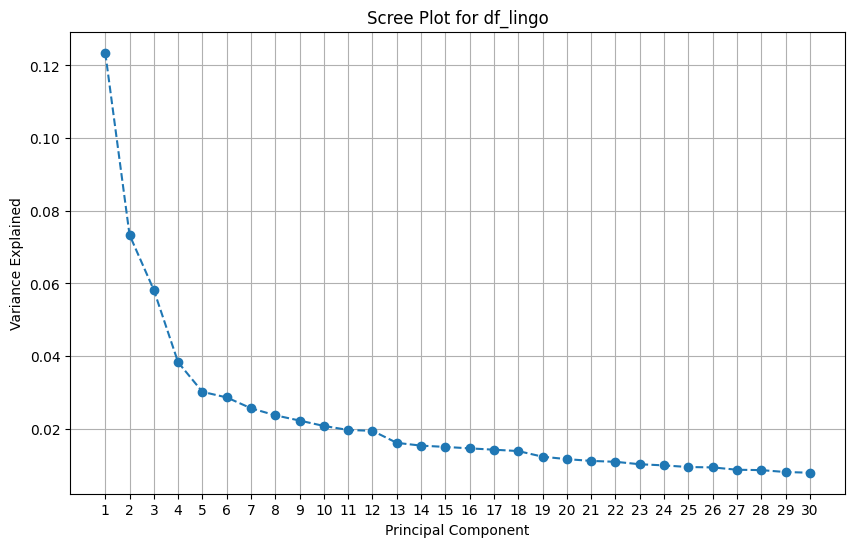

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming input_directory is defined
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):  # Adjust this if your files are in a different format
        # Load the data
        df = pd.read_csv(os.path.join(input_directory, filename))
        
        # Skip the first three columns if necessary
        df_to_analyze = df.iloc[:, 3:]

        # Apply PCA
        pca = PCA()  # Fit PCA without specifying n_components to get all components
        pca.fit(df_to_analyze)

        # Get the explained variance (eigenvalues)
        explained_variance = pca.explained_variance_ratio_

        # Create a scree plot for the first 30 components
        num_components_to_plot = min(30, len(explained_variance))  # Limit to 30 or fewer components
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, num_components_to_plot + 1), explained_variance[:num_components_to_plot], marker='o', linestyle='--')
        plt.title(f'Scree Plot for {filename[:-4]}')  # Remove the .csv extension for the title
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Explained')
        plt.xticks(range(1, num_components_to_plot + 1))
        plt.grid()
        plt.show()

## Razpršeni diagram dvodimenzijske prezentacije prstnih odtisov molekul, ki bodo uporabljene za treniranje modela SU

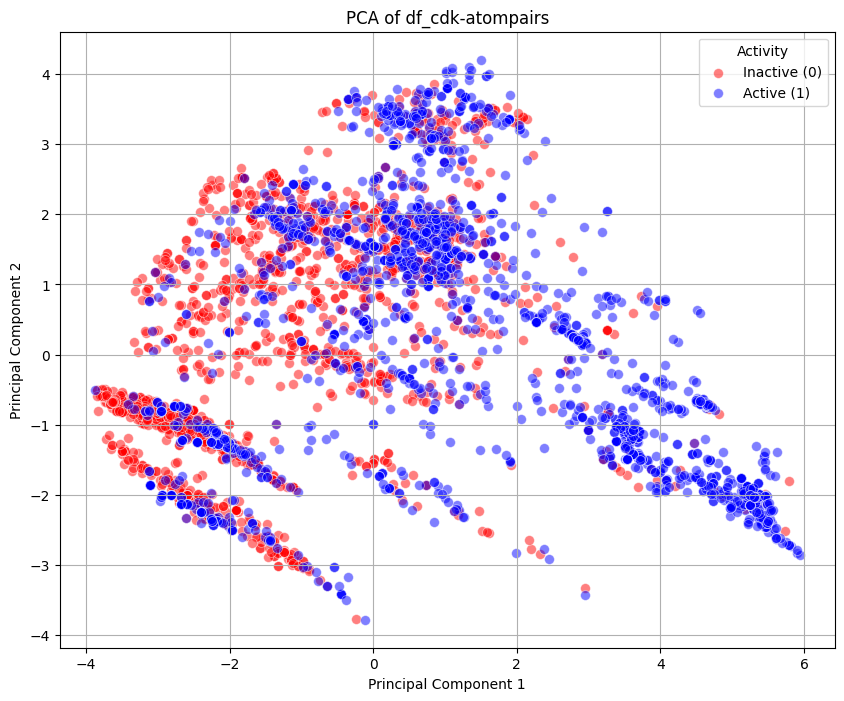

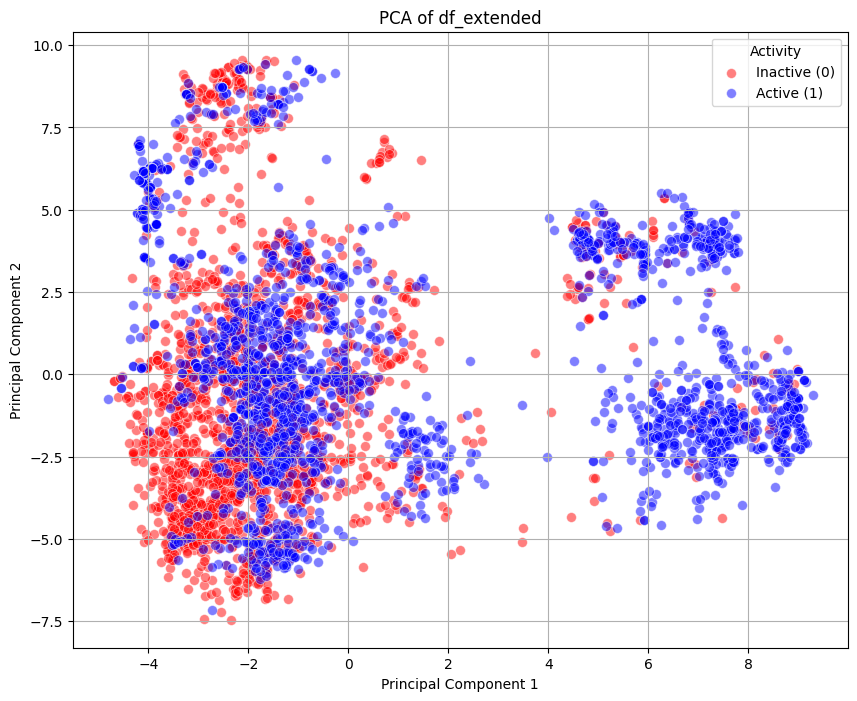

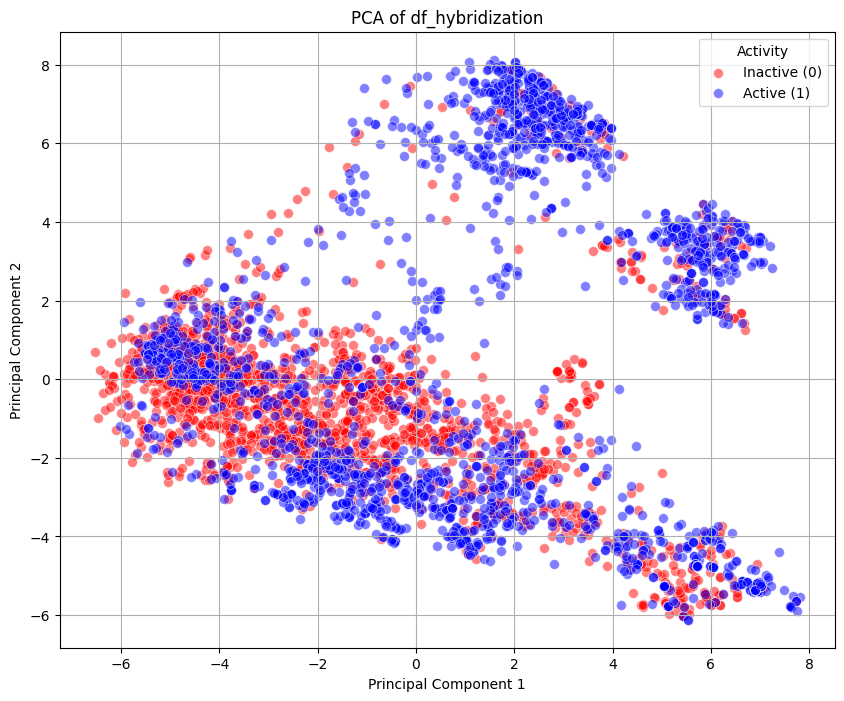

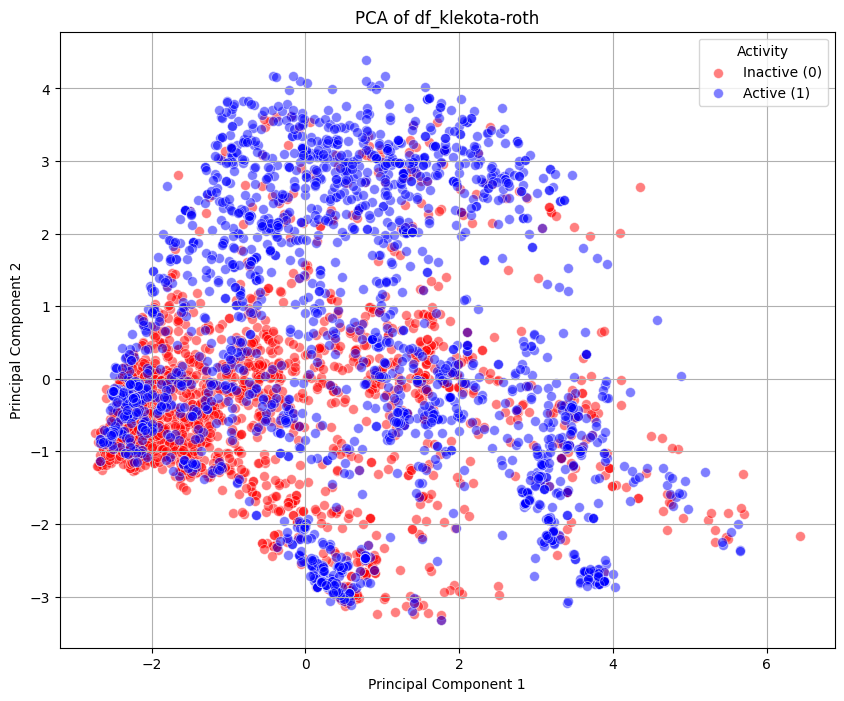

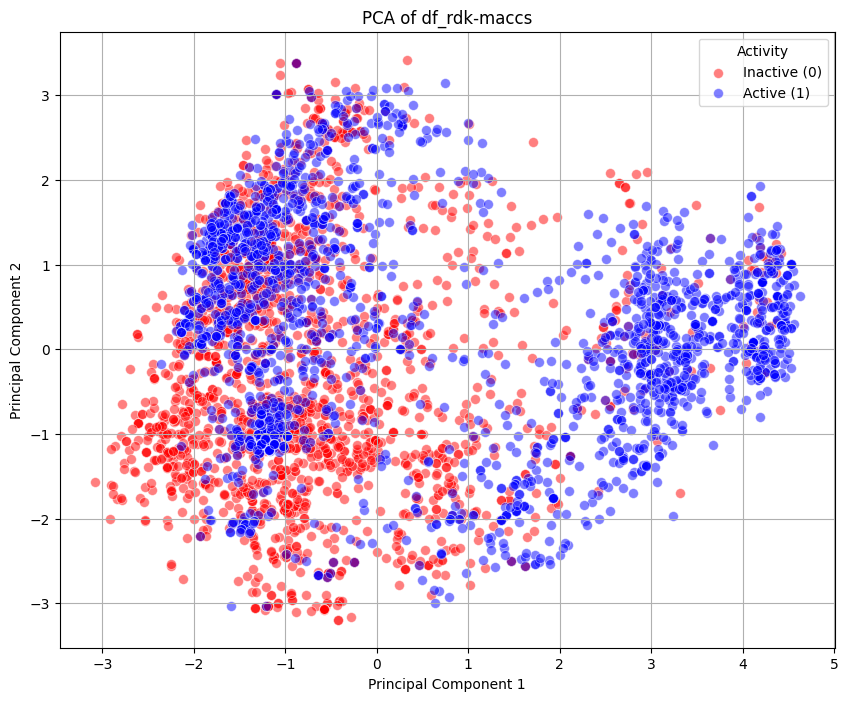

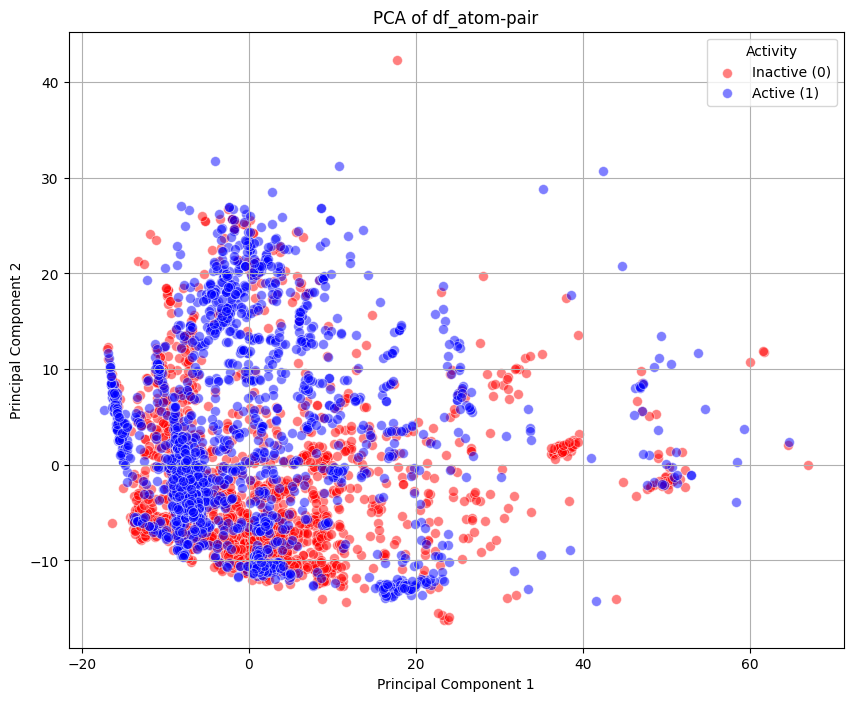

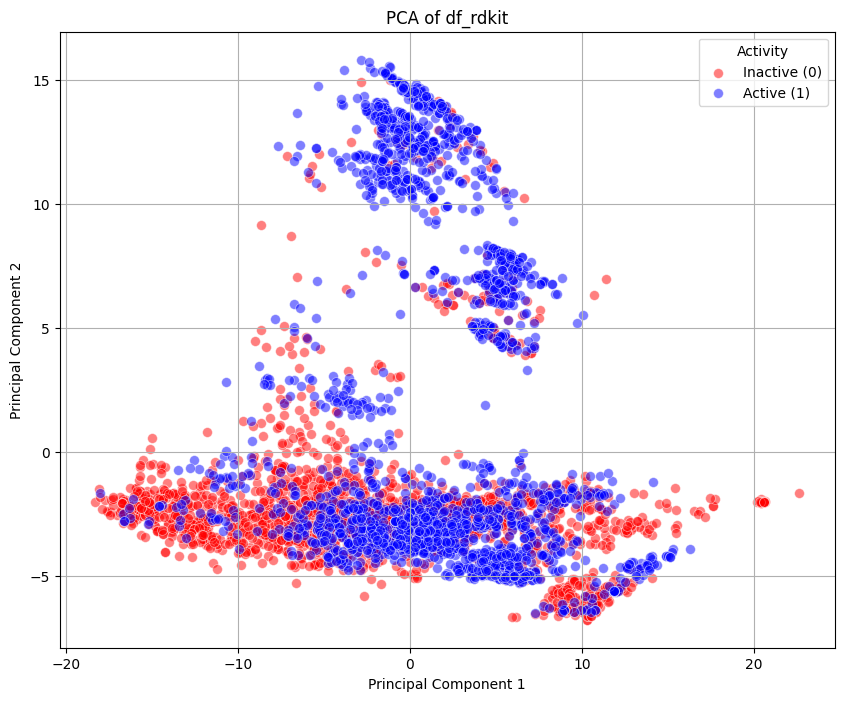

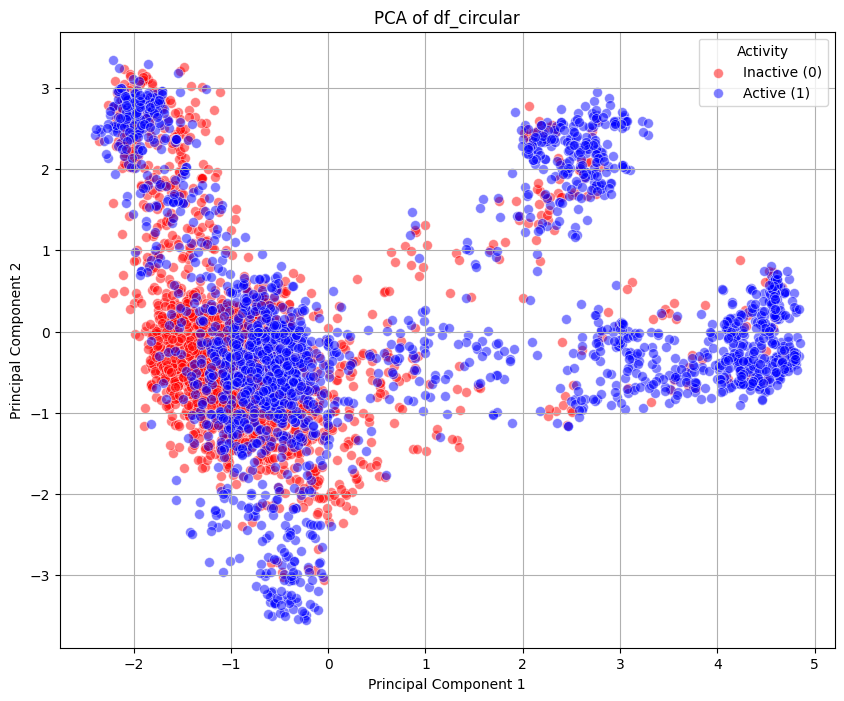

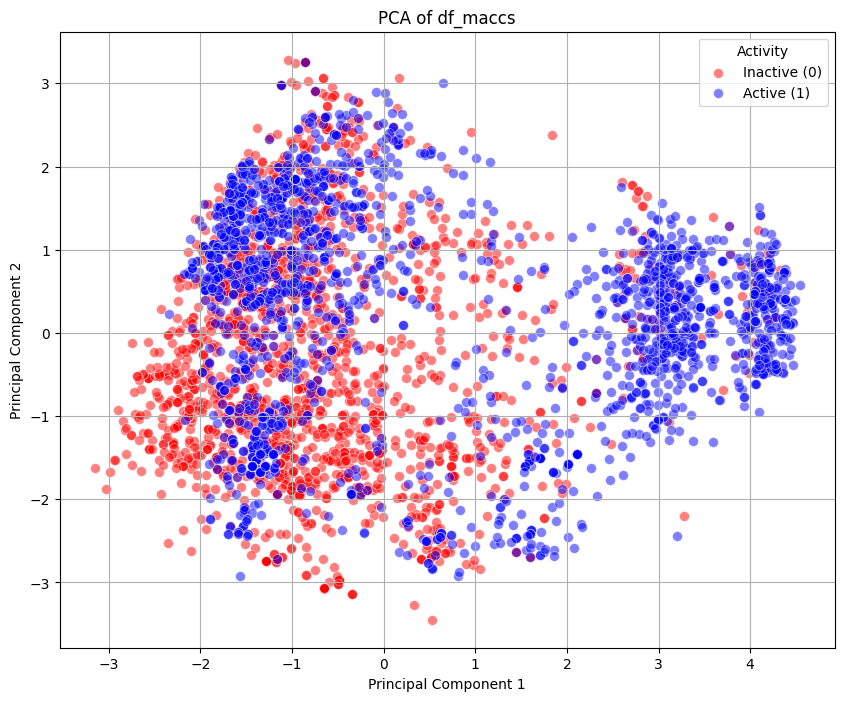

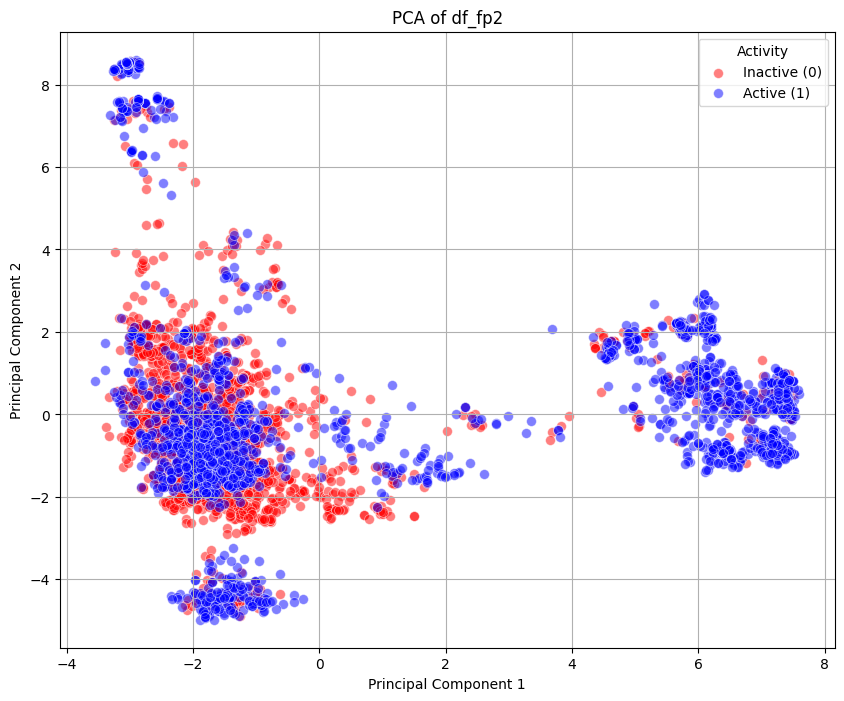

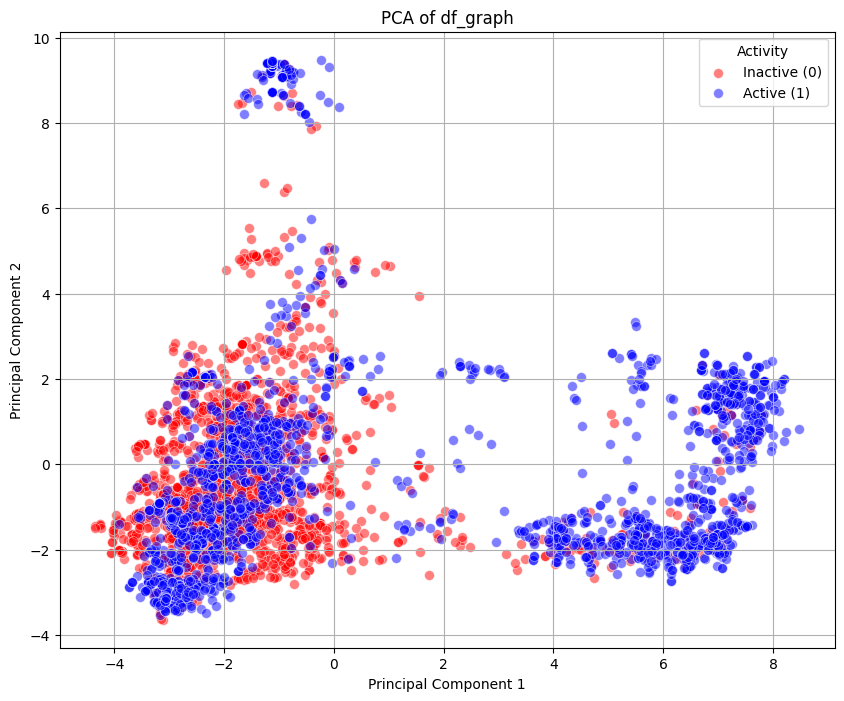

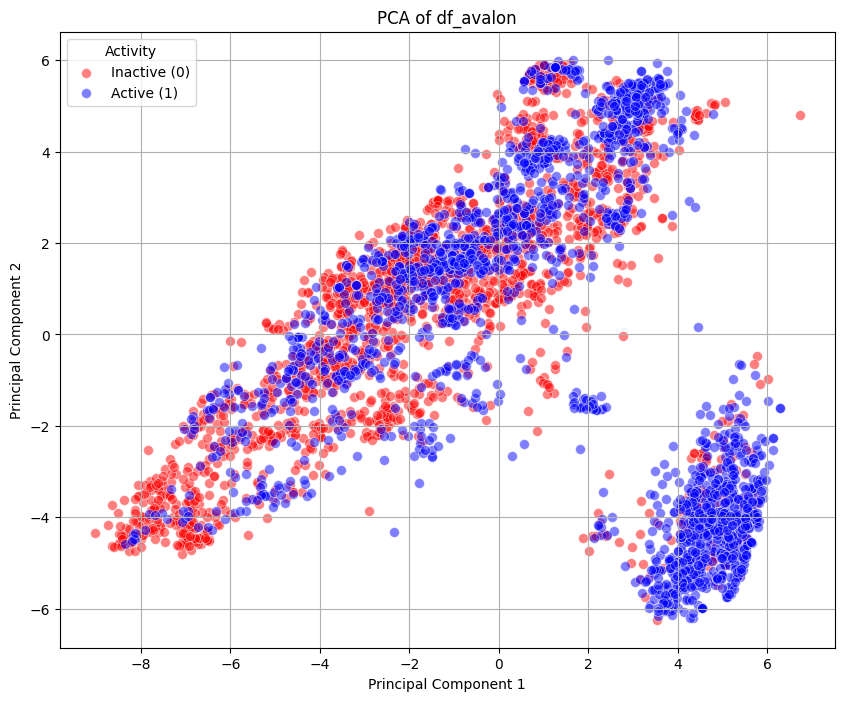

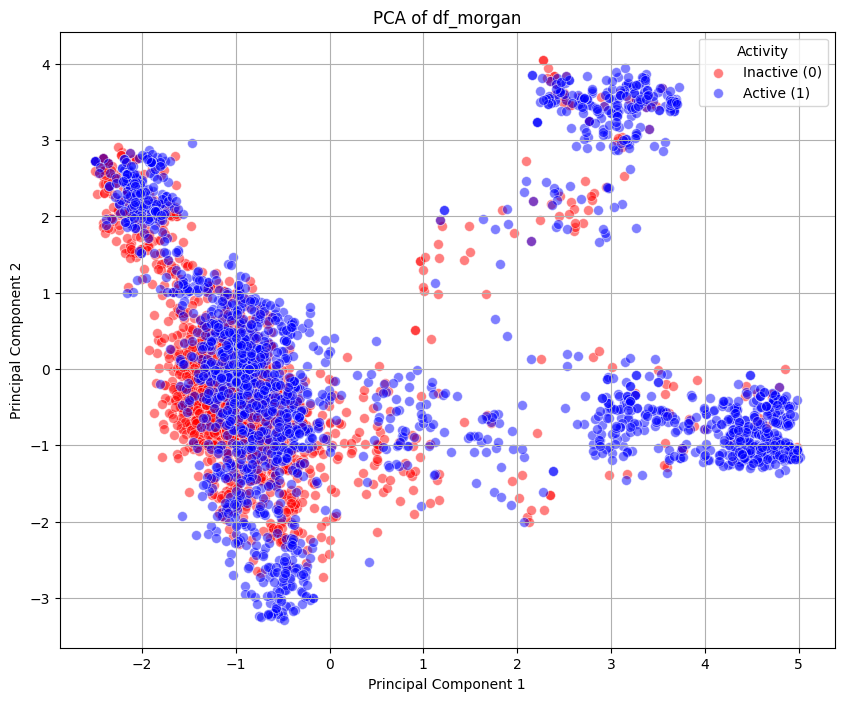

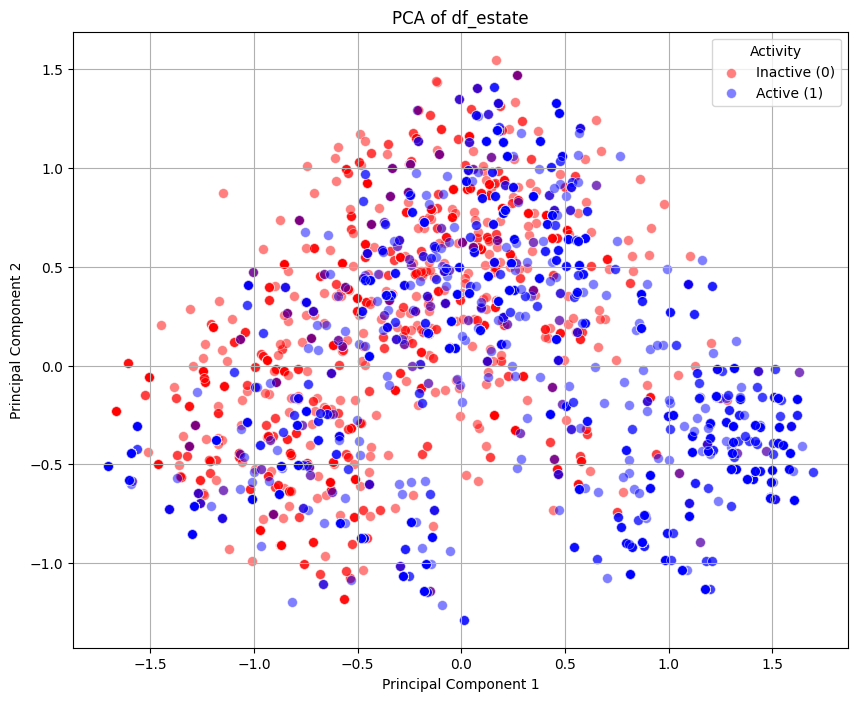

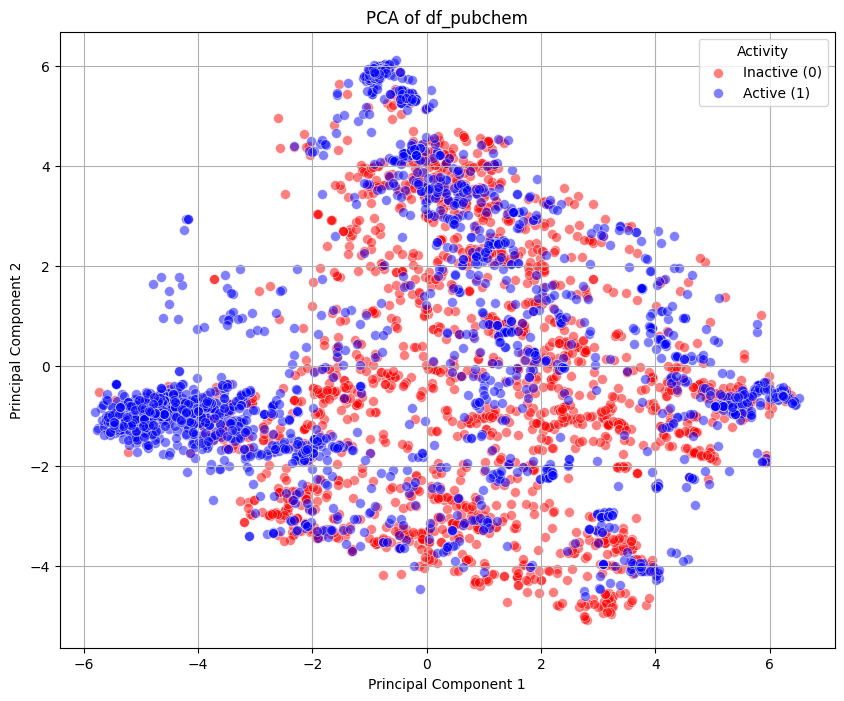

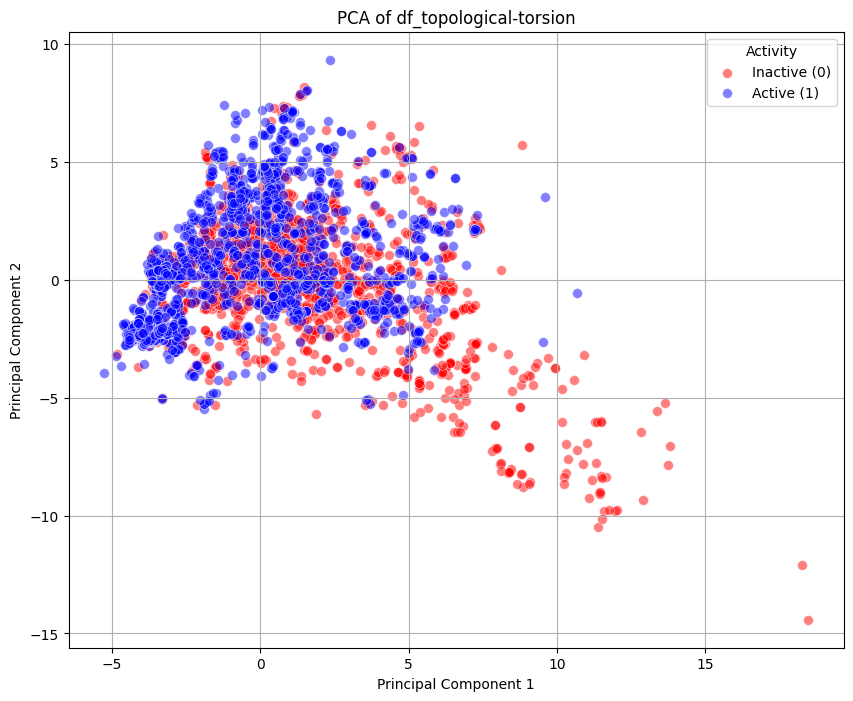

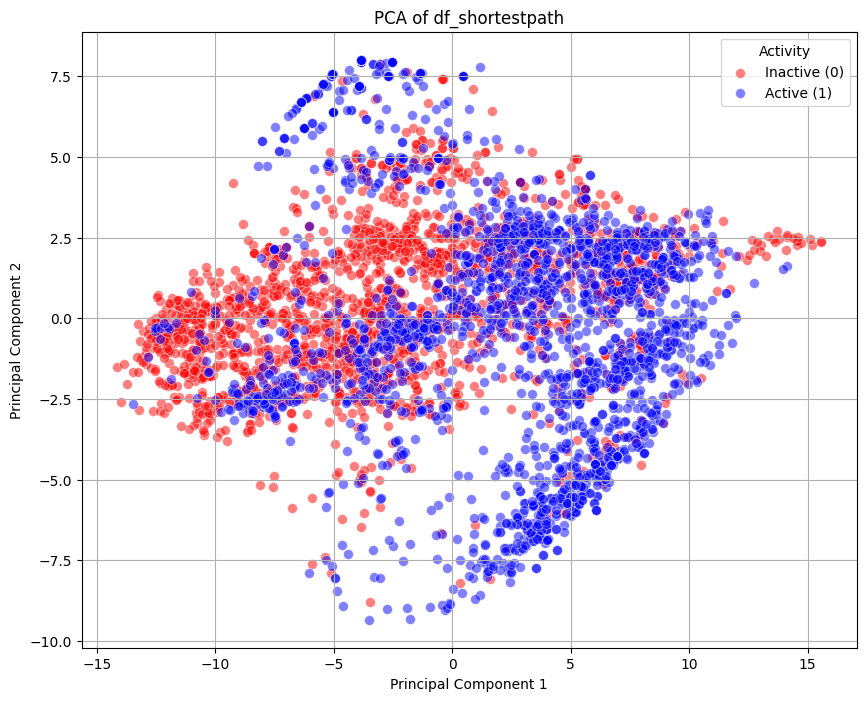

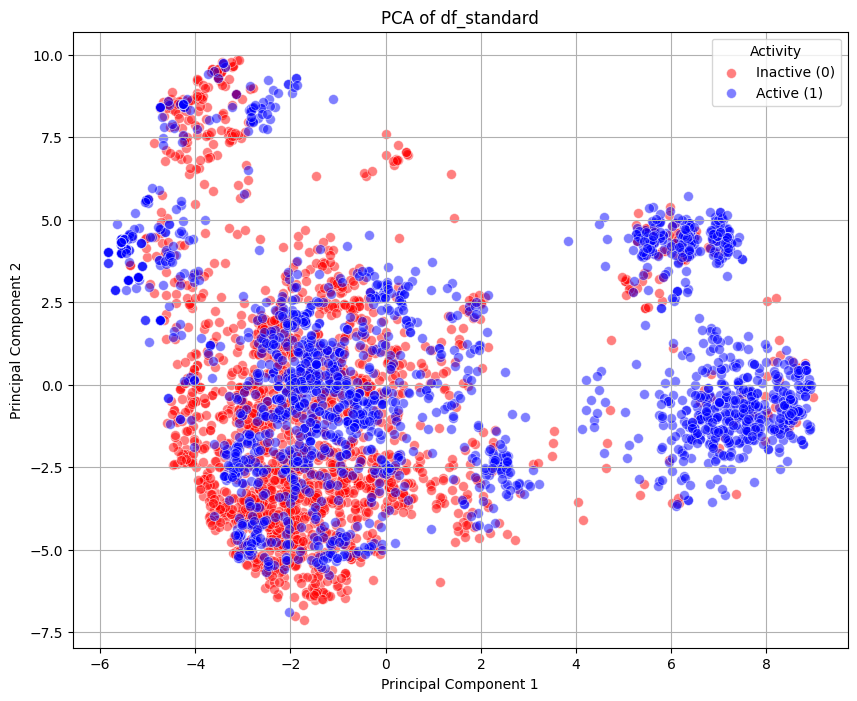

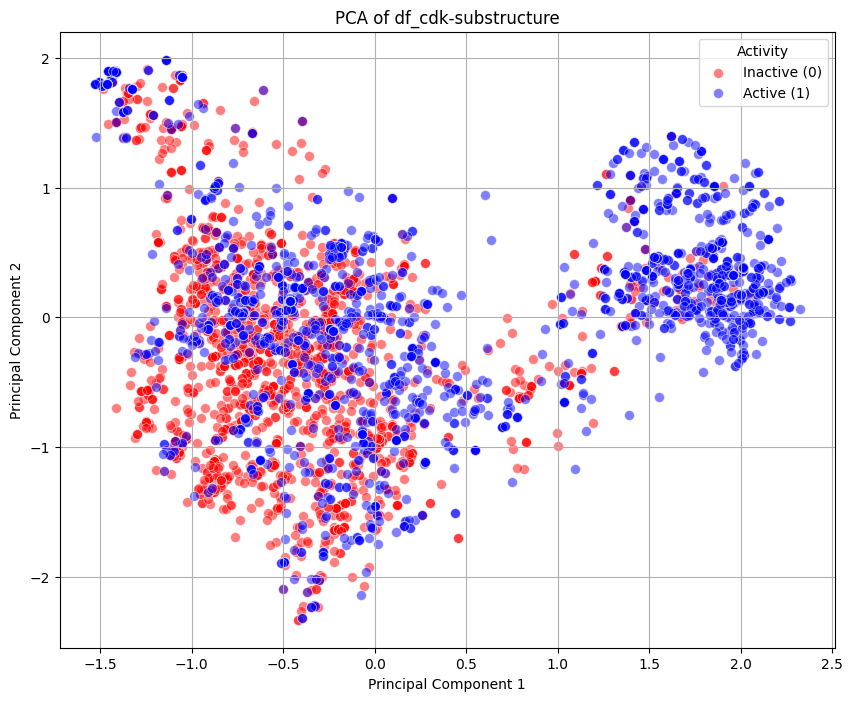

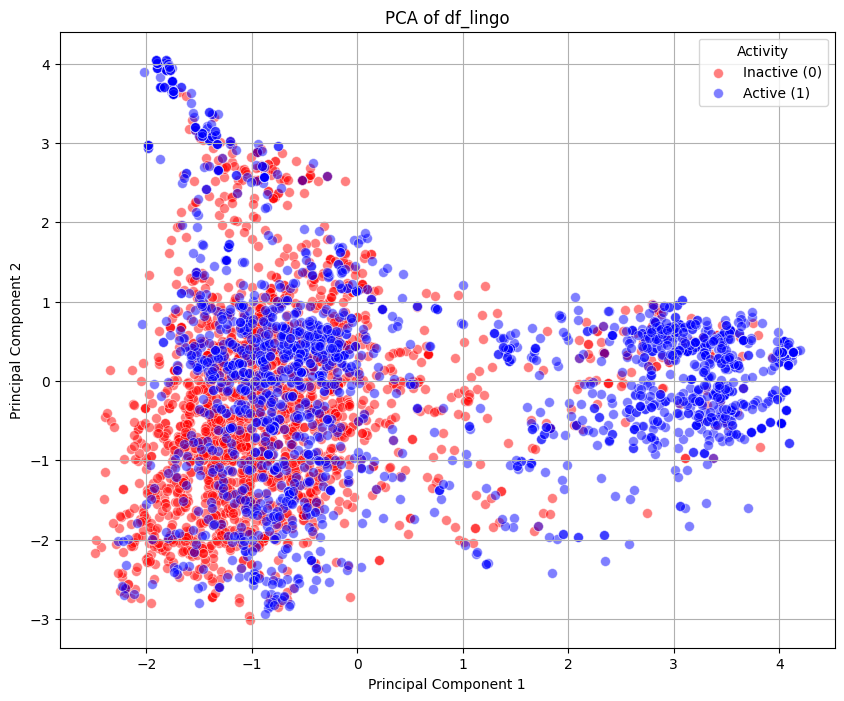

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming input_directory is defined
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):  # Adjust this if your files are in a different format
        # Load the data
        df = pd.read_csv(os.path.join(input_directory, filename))
        
        # Skip the first three columns if necessary
        df_to_analyze = df.iloc[:, 3:]

        # Extract the 'Activity' column for color mapping
        activity = df['Activity']  # Make sure 'Activity' is the correct column name

        # Apply PCA
        pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
        principal_components = pca.fit_transform(df_to_analyze)

        # Create a DataFrame with the principal components and the Activity column
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Activity'] = activity  # Add the Activity column to the PCA DataFrame

        # Plot the PCA results with color mapping
        plt.figure(figsize=(10, 8))
        
        # Plot inactive molecules with transparency
        sns.scatterplot(x='PC1', y='PC2', data=pca_df[pca_df['Activity'] == 0], 
                        color='red', alpha=0.5, label='Inactive (0)', s=50)  # Adjust size as needed
        
        # Plot active molecules with transparency
        sns.scatterplot(x='PC1', y='PC2', data=pca_df[pca_df['Activity'] == 1], 
                        color='blue', alpha=0.5, label='Active (1)', s=50)  # Adjust size as needed
        
        plt.title(f'PCA of {filename[:-4]}')  # Remove the .csv extension for the title
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid()
        plt.legend(title='Activity')
        plt.show()


In [6]:
# Assuming you have the DataFrame already
filename = 'df_circular.csv'
file_path = os.path.join(input_directory, filename)  # Full path to the file
df_1 = pd.read_csv(file_path)

# Count the number of times each fingerprint feature is set to 1 across the entire dataset
# Skip the first two columns (Smiles and Activity)
feature_counts = df_1.iloc[:, 3:].sum(axis=0)

# Sort the counts in descending order to find the most common features
sorted_feature_counts = feature_counts.sort_values(ascending=False)

# Create a DataFrame for better visualization
feature_counts_df = pd.DataFrame(sorted_feature_counts).reset_index()
feature_counts_df.columns = ['Feature', 'Count']

# Display the resulting DataFrame
feature_counts_df


Feature   Count
0     Bit_133  4140.0
1     Bit_967  4130.0
2     Bit_549  3751.0
3     Bit_404  3209.0
4     Bit_514  2637.0
...       ...     ...
1019  Bit_519    24.0
1020  Bit_307    24.0
1021   Bit_98    23.0
1022   Bit_78    22.0
1023  Bit_739    21.0

[1024 rows x 2 columns]

In [7]:
df = df_1.copy()

# Split the DataFrame into active and inactive based on the 'Activity' column
active_df = df[df['Activity'] == 1]  # Assuming 1 indicates active
inactive_df = df[df['Activity'] == 0]  # Assuming 0 indicates inactive

# Count the number of times each fingerprint feature is set to 1 for active compounds
active_bit_counts = active_df.iloc[:, 3:].sum(axis=0)  # Skip the first two columns (Smiles and Activity)
active_bit_counts = active_bit_counts.sort_values(ascending=False)

# Count the number of times each fingerprint feature is set to 1 for inactive compounds
inactive_bit_counts = inactive_df.iloc[:, 3:].sum(axis=0)  # Skip the first two columns
inactive_bit_counts = inactive_bit_counts.sort_values(ascending=False)

# Create DataFrames to hold the counts
active_counts_df = pd.DataFrame(active_bit_counts).reset_index()
active_counts_df.columns = ['Feature', 'Active_Count']

inactive_counts_df = pd.DataFrame(inactive_bit_counts).reset_index()
inactive_counts_df.columns = ['Feature', 'Inactive_Count']

# Merge the two DataFrames on the feature column
merged_counts_df = pd.merge(active_counts_df, inactive_counts_df, on='Feature', how='outer')

sorted_merged_counts_df = merged_counts_df.sort_values(by='Active_Count', ascending=False)
sorted_merged_counts_df

Feature  Active_Count  Inactive_Count
63   Bit_133        2102.0          2038.0
988  Bit_967        2101.0          2029.0
524  Bit_549        1899.0          1852.0
364  Bit_404        1872.0          1337.0
487  Bit_515        1692.0           900.0
..       ...           ...             ...
780   Bit_78           7.0            15.0
355  Bit_397           7.0            59.0
443  Bit_476           6.0            24.0
256  Bit_307           5.0            19.0
687  Bit_696           4.0            29.0

[1024 rows x 3 columns]

## Pregled lastnosti, ki najbolj pogosto razlikujejo aktivne od neaktivnih molekul

In [8]:
merged_counts_df['Difference'] = merged_counts_df['Active_Count'] - merged_counts_df['Inactive_Count']

# Sort the DataFrame by the Difference column in descending order
sorted_df = merged_counts_df.sort_values(by='Difference', ascending=False)
sorted_df

Feature  Active_Count  Inactive_Count  Difference
292   Bit_34        1474.0           629.0       845.0
487  Bit_515        1692.0           900.0       792.0
432  Bit_466        1445.0           682.0       763.0
65   Bit_135        1003.0           336.0       667.0
502  Bit_529        1158.0           497.0       661.0
..       ...           ...             ...         ...
216  Bit_271         244.0           528.0      -284.0
640  Bit_653         443.0           789.0      -346.0
969   Bit_95         518.0           924.0      -406.0
649  Bit_661         250.0           679.0      -429.0
454  Bit_486         619.0          1156.0      -537.0

[1024 rows x 4 columns]